# IMPORT

In [70]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import cross_val_score
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.model_selection import StratifiedKFold
from imblearn.over_sampling import RandomOverSampler
from sklearn.metrics import roc_auc_score, roc_curve
from imblearn.under_sampling import RandomUnderSampler
from sklearn.metrics import roc_curve, auc

In [2]:
df = pd.read_csv('fraud.csv')
df.head()

,step,customer,age,gender,zipcodeOri,merchant,zipMerchant,category,amount,fraud
0,0,'C1093826151','4','M','28007','M348934600','28007','es_transportation',4.55,0
1,0,'C352968107','2','M','28007','M348934600','28007','es_transportation',39.68,0
2,0,'C2054744914','4','F','28007','M1823072687','28007','es_transportation',26.89,0
3,0,'C1760612790','3','M','28007','M348934600','28007','es_transportation',17.25,0
4,0,'C757503768','5','M','28007','M348934600','28007','es_transportation',35.72,0


# DATA PRE-PROCESSING

In [3]:
df_clean = df.replace({"'": ''}, regex=True)
df_clean.head()

,step,customer,age,gender,zipcodeOri,merchant,zipMerchant,category,amount,fraud
0,0,C1093826151,4,M,28007,M348934600,28007,es_transportation,4.55,0
1,0,C352968107,2,M,28007,M348934600,28007,es_transportation,39.68,0
2,0,C2054744914,4,F,28007,M1823072687,28007,es_transportation,26.89,0
3,0,C1760612790,3,M,28007,M348934600,28007,es_transportation,17.25,0
4,0,C757503768,5,M,28007,M348934600,28007,es_transportation,35.72,0


In [4]:
df_clean['age'] = df_clean['age'].replace('U', -1).astype(int)

In [5]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 594643 entries, 0 to 594642
Data columns (total 10 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   step         594643 non-null  int64  
 1   customer     594643 non-null  object 
 2   age          594643 non-null  int64  
 3   gender       594643 non-null  object 
 4   zipcodeOri   594643 non-null  object 
 5   merchant     594643 non-null  object 
 6   zipMerchant  594643 non-null  object 
 7   category     594643 non-null  object 
 8   amount       594643 non-null  float64
 9   fraud        594643 non-null  int64  
dtypes: float64(1), int64(3), object(6)
memory usage: 45.4+ MB


In [6]:
df_clean.isnull().sum()
#no missing values


step           0
customer       0
age            0
gender         0
zipcodeOri     0
merchant       0
zipMerchant    0
category       0
amount         0
fraud          0
dtype: int64

# DATA EXPLORATION

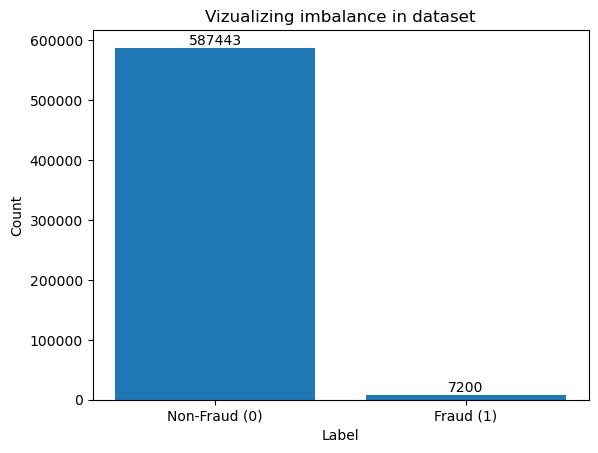

In [7]:
bars = plt.bar(df_clean['fraud'].value_counts().index, df_clean['fraud'].value_counts().values, tick_label=['Non-Fraud (0)', 'Fraud (1)'])

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 300, yval, ha='center', va='bottom')

plt.xlabel('Label')
plt.ylabel('Count')
plt.title('Vizualizing imbalance in dataset')

plt.show()

## Transaction Amount

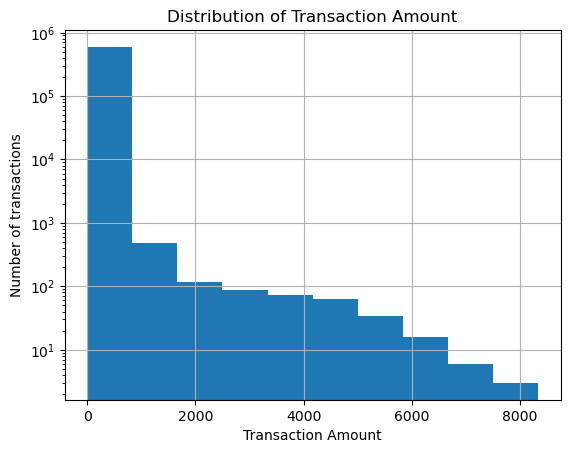

In [8]:
df_clean.hist(column = ['amount'],bins=10, log = True)
plt.xlabel('Transaction Amount')
plt.ylabel('Number of transactions')
plt.title('Distribution of Transaction Amount')
plt.show()

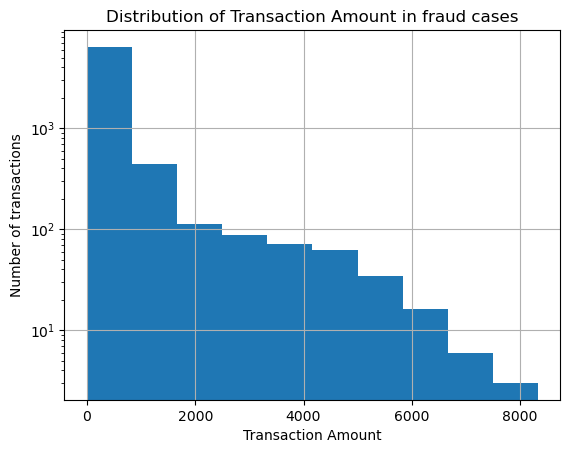

In [9]:
df_clean.loc[df_clean.fraud.eq(1)].hist(column = ['amount'],bins=10, log = True)
plt.xlabel('Transaction Amount')
plt.ylabel('Number of transactions')
plt.title('Distribution of Transaction Amount in fraud cases')
plt.show()

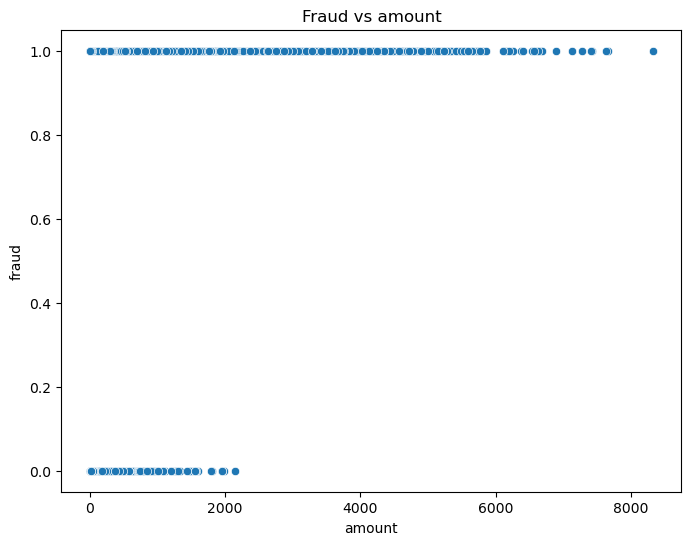

In [10]:
plt.figure(figsize=(8,6))
sns.scatterplot(data=df_clean, x='amount', y='fraud')
plt.title('Fraud vs amount')
plt.show()

The graph shows that all transaction amount of non-fraud transactions lie between 0 - 3000. Hence higher amount transactions are more likely to be fraud

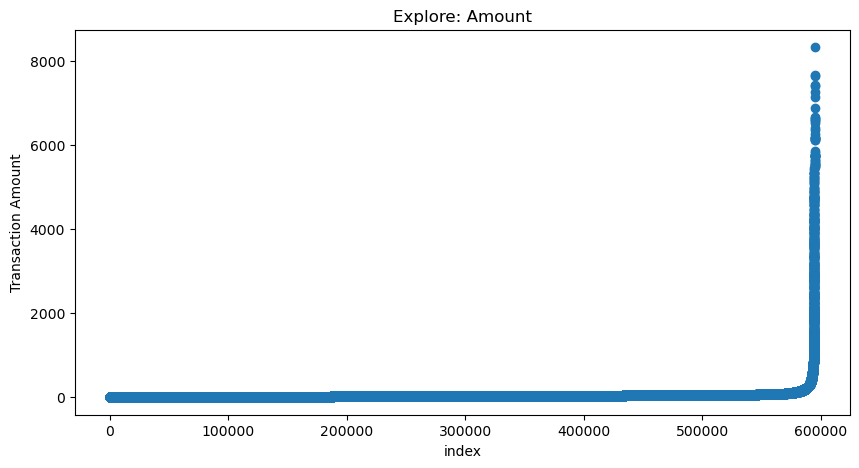

In [11]:
plt.figure(figsize=(10, 5))
plt.scatter(range(df_clean.shape[0]), np.sort(df_clean['amount'].values))
plt.xlabel('index')
plt.ylabel('Transaction Amount')
plt.title('Explore: Amount')
plt.show()

## Age

Distribution of age in all data (%)
age
 2    31.50
 3    24.74
 4    18.33
 5    10.53
 1     9.78
 6     4.50
 0     0.41
-1     0.20
Name: count, dtype: float64

 Distribution of age in fraudulent data (%)
age
 2    32.56
 3    24.38
 4    19.58
 1     9.57
 5     9.53
 6     3.62
 0     0.67
-1     0.10
Name: count, dtype: float64


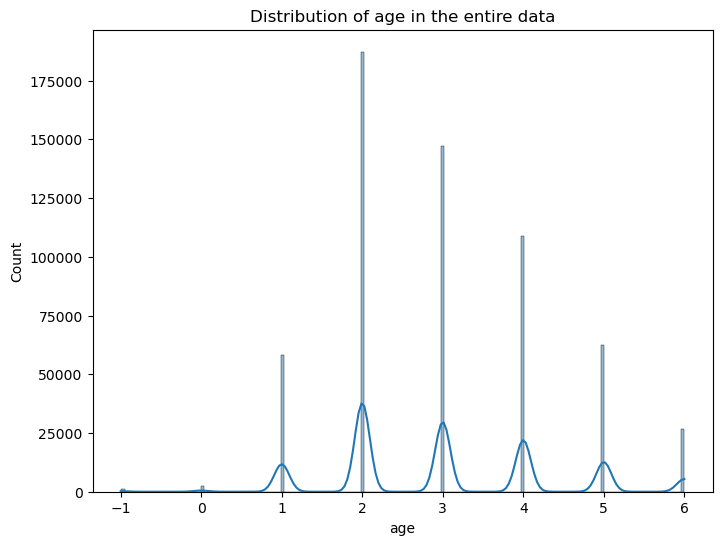

In [12]:
print('Distribution of age in all data (%)')
print(round(100*((df_clean['age'].value_counts())/len(df_clean)),2))

print('\n','Distribution of age in fraudulent data (%)')
print(round(100*((df_clean.loc[df_clean.fraud.eq(1)]['age'].value_counts())/len(df_clean.loc[df_clean.fraud.eq(1)])),2))


plt.figure(figsize=(8,6))
sns.histplot(df_clean['age'], kde =True)
plt.title('Distribution of age in the entire data')
plt.show()

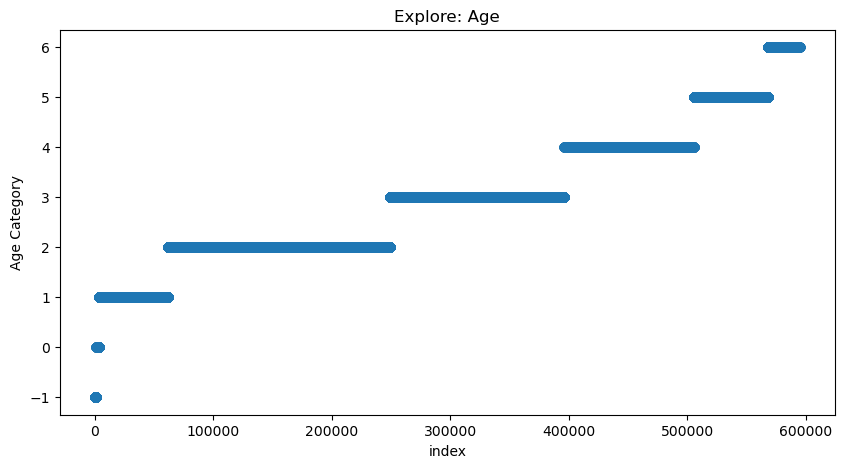

In [13]:
plt.figure(figsize=(10, 5))
plt.scatter(range(df_clean.shape[0]), np.sort(df_clean['age'].values))
plt.xlabel('index')
plt.ylabel('Age Category')
plt.title('Explore: Age')
plt.show()

## Gender

Distribution of gender in all data (%)
gender
F    54.58
M    45.13
E     0.20
U     0.09
Name: count, dtype: float64

 Distribution of gender in fraudulent data (%)
gender
F    66.08
M    33.82
E     0.10
Name: count, dtype: float64


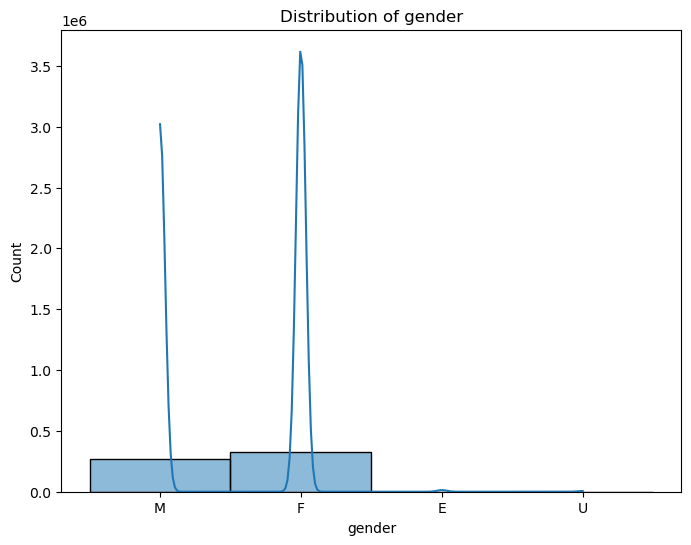

In [14]:
print('Distribution of gender in all data (%)')
print(round(100*((df_clean['gender'].value_counts())/len(df_clean)),2))

print('\n','Distribution of gender in fraudulent data (%)')
print(round(100*((df_clean.loc[df_clean.fraud.eq(1)]['gender'].value_counts())/len(df_clean.loc[df_clean.fraud.eq(1)])),2))


plt.figure(figsize=(8,6))
sns.histplot(df_clean['gender'], kde =True)
plt.title('Distribution of gender')
plt.show()

## Zipcode

In [15]:
df_clean['zipcodeOri'].unique()

array(['28007'], dtype=object)

In [16]:
df_clean['zipMerchant'].unique()

array(['28007'], dtype=object)

Since there is only one unique zipcode value, it can be removed

## Merchant & Customer

We present the mean fraud value for different merchants and customers. Since these values are different for different merhants/customers, this means that merchant and customer are an important feature. However, these features will need some engineering.

In [17]:
print(df_clean.groupby('merchant')['fraud'].mean().sort_values(ascending=False))

merchant
M1294758098    0.963351
M3697346       0.941558
M1873032707    0.864000
M732195782     0.851974
M980657600     0.832109
M1353266412    0.820513
M857378720     0.754098
M2080407379    0.750000
M2011752106    0.680328
M17379832      0.631206
M2122776122    0.586510
M480139044     0.465792
M1741626453    0.371212
M495352832     0.347826
M923029380     0.315789
M1888755466    0.250000
M1198415165    0.226582
M933210764     0.173913
M1748431652    0.131387
M547558035     0.122234
M840466850     0.112938
M1649169323    0.105712
M348875670     0.093458
M1535107174    0.093148
M50039827      0.050218
M855959430     0.045917
M209847108     0.027792
M78078399      0.027363
M151143676     0.018829
M692898500     0.017778
M1313686961    0.000000
M97925176      0.000000
M1600850729    0.000000
M1726401631    0.000000
M85975013      0.000000
M1788569036    0.000000
M1823072687    0.000000
M1842530320    0.000000
M1872033263    0.000000
M1400236507    0.000000
M348934600     0.000000
M677738

In [18]:
print(df_clean.groupby('customer')['fraud'].mean().sort_values(ascending=False))

customer
C910454738     0.945652
C2004941826    0.944444
C381007057     0.890000
C1572610482    0.881188
C617723960     0.869565
                 ...   
C1389923471    0.000000
C1389311354    0.000000
C2023751717    0.000000
C202531238     0.000000
C1949440316    0.000000
Name: fraud, Length: 4112, dtype: float64


# FEATURE ENGINEERING

## Gender & Category

Both gender and category are categorical variables. We will convert them to dummy/indicator variables

In [19]:
gender_dummies = pd.get_dummies(df_clean['gender'], prefix='gender')
df_clean = pd.concat([df_clean, gender_dummies], axis=1)
df_clean.columns

Index(['step', 'customer', 'age', 'gender', 'zipcodeOri', 'merchant',
       'zipMerchant', 'category', 'amount', 'fraud', 'gender_E', 'gender_F',
       'gender_M', 'gender_U'],
      dtype='object')

In [20]:
df_clean['category'].unique()

array(['es_transportation', 'es_health', 'es_otherservices', 'es_food',
       'es_hotelservices', 'es_barsandrestaurants', 'es_tech',
       'es_sportsandtoys', 'es_wellnessandbeauty', 'es_hyper',
       'es_fashion', 'es_home', 'es_contents', 'es_travel', 'es_leisure'],
      dtype=object)

In [21]:
category_dummies = pd.get_dummies(df_clean['category'], prefix='category')
df_clean = pd.concat([df_clean, category_dummies], axis=1)
df_clean = df_clean.drop(['category'], axis=1)
df_clean.head()

,step,customer,age,gender,zipcodeOri,merchant,zipMerchant,amount,fraud,gender_E,...,category_es_home,category_es_hotelservices,category_es_hyper,category_es_leisure,category_es_otherservices,category_es_sportsandtoys,category_es_tech,category_es_transportation,category_es_travel,category_es_wellnessandbeauty
0,0,C1093826151,4,M,28007,M348934600,28007,4.55,0,False,...,False,False,False,False,False,False,False,True,False,False
1,0,C352968107,2,M,28007,M348934600,28007,39.68,0,False,...,False,False,False,False,False,False,False,True,False,False
2,0,C2054744914,4,F,28007,M1823072687,28007,26.89,0,False,...,False,False,False,False,False,False,False,True,False,False
3,0,C1760612790,3,M,28007,M348934600,28007,17.25,0,False,...,False,False,False,False,False,False,False,True,False,False
4,0,C757503768,5,M,28007,M348934600,28007,35.72,0,False,...,False,False,False,False,False,False,False,True,False,False


In [22]:
features_cat = ['gender_E', 'gender_M', 'gender_F', 'gender_U']
print('Comparison of fraudulent transactions v gender')
for feature in features_cat:
    print(df_clean.groupby([feature,'fraud'])['fraud'].count())

Comparison of fraudulent transactions v gender
gender_E  fraud
False     0        586272
          1          7193
True      0          1171
          1             7
Name: fraud, dtype: int64
gender_M  fraud
False     0        321493
          1          4765
True      0        265950
          1          2435
Name: fraud, dtype: int64
gender_F  fraud
False     0        267636
          1          2442
True      0        319807
          1          4758
Name: fraud, dtype: int64
gender_U  fraud
False     0        586928
          1          7200
True      0           515
Name: fraud, dtype: int64


## Merchant
We create two new features to represent a merchant, the average transaction count and the total transactions for each merchant.

In [23]:
df_model = df_clean.drop(['zipMerchant','zipcodeOri'], axis=1)

In [24]:
# Number of transactions per merchant
df_model['merchant_transactions_count'] = df_model.groupby('merchant')['merchant'].transform('count')
df_model['merchant_average_amount'] = df_model.groupby('merchant')['amount'].transform('mean')

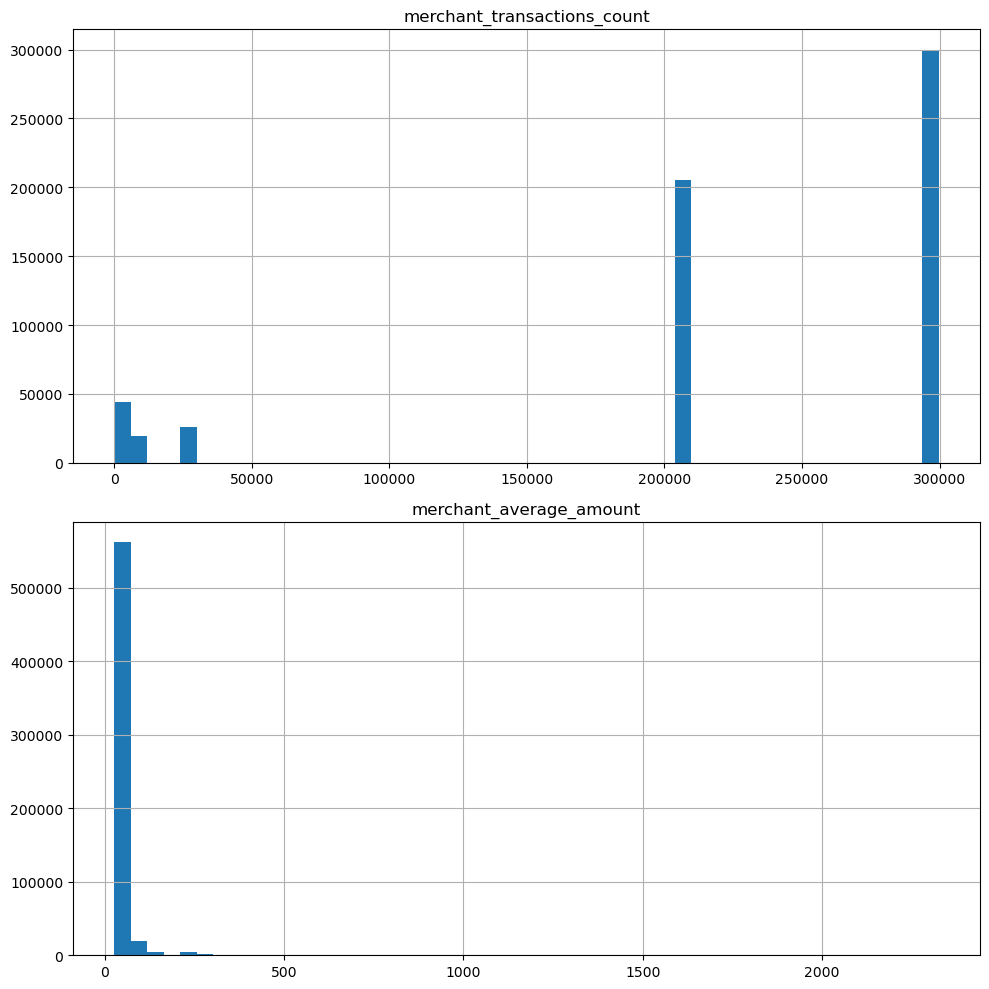

In [25]:
df_model[['merchant_transactions_count', 'merchant_average_amount']].hist(bins=50, layout=(2,1), figsize=(10,10))
plt.tight_layout()  # Adjusts subplots
plt.show()

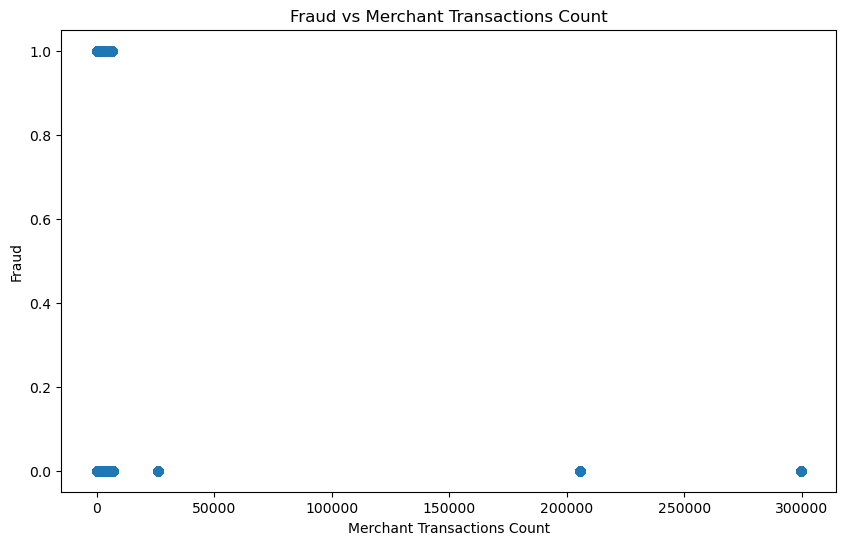

In [26]:
# Scatter plots for merchant_transactions_count and merchant_average_amount versus fraud
plt.figure(figsize=(10,6))
plt.scatter(df_model['merchant_transactions_count'], df_model['fraud'])
plt.title('Fraud vs Merchant Transactions Count')
plt.xlabel('Merchant Transactions Count')
plt.ylabel('Fraud')
plt.show()

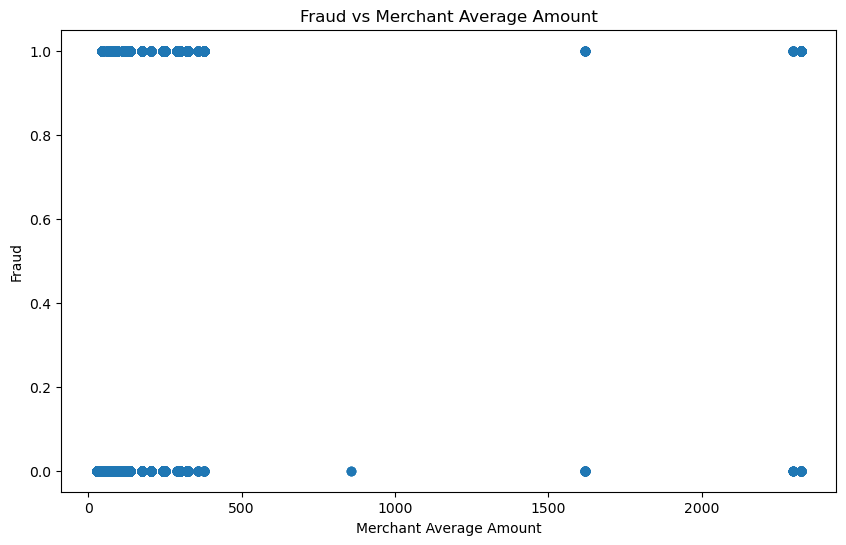

In [27]:
plt.figure(figsize=(10,6))
plt.scatter(df_model['merchant_average_amount'], df_model['fraud'])
plt.title('Fraud vs Merchant Average Amount')
plt.xlabel('Merchant Average Amount')
plt.ylabel('Fraud')
plt.show()

In [28]:
print(df_model[['merchant_transactions_count', 'merchant_average_amount', 'fraud']].corr()['fraud'])

merchant_transactions_count   -0.246651
merchant_average_amount        0.465929
fraud                          1.000000
Name: fraud, dtype: float64


## Customer
We create similiar metrics for customer as well

In [29]:
df_model['customer_transactions_count'] = df_model.groupby('customer')['customer'].transform('count')

In [30]:
df_model['customer_average_amount'] = df_model.groupby('customer')['amount'].transform('mean')

In [31]:
df_model.head()

,step,customer,age,gender,merchant,amount,fraud,gender_E,gender_F,gender_M,...,category_es_otherservices,category_es_sportsandtoys,category_es_tech,category_es_transportation,category_es_travel,category_es_wellnessandbeauty,merchant_transactions_count,merchant_average_amount,customer_transactions_count,customer_average_amount
0,0,C1093826151,4,M,M348934600,4.55,0,False,False,True,...,False,False,False,True,False,False,205426,26.965542,167,28.240719
1,0,C352968107,2,M,M348934600,39.68,0,False,False,True,...,False,False,False,True,False,False,205426,26.965542,169,32.661361
2,0,C2054744914,4,F,M1823072687,26.89,0,False,True,False,...,False,False,False,True,False,False,299693,26.953146,65,41.443692
3,0,C1760612790,3,M,M348934600,17.25,0,False,False,True,...,False,False,False,True,False,False,205426,26.965542,171,30.338772
4,0,C757503768,5,M,M348934600,35.72,0,False,False,True,...,False,False,False,True,False,False,205426,26.965542,145,31.696759


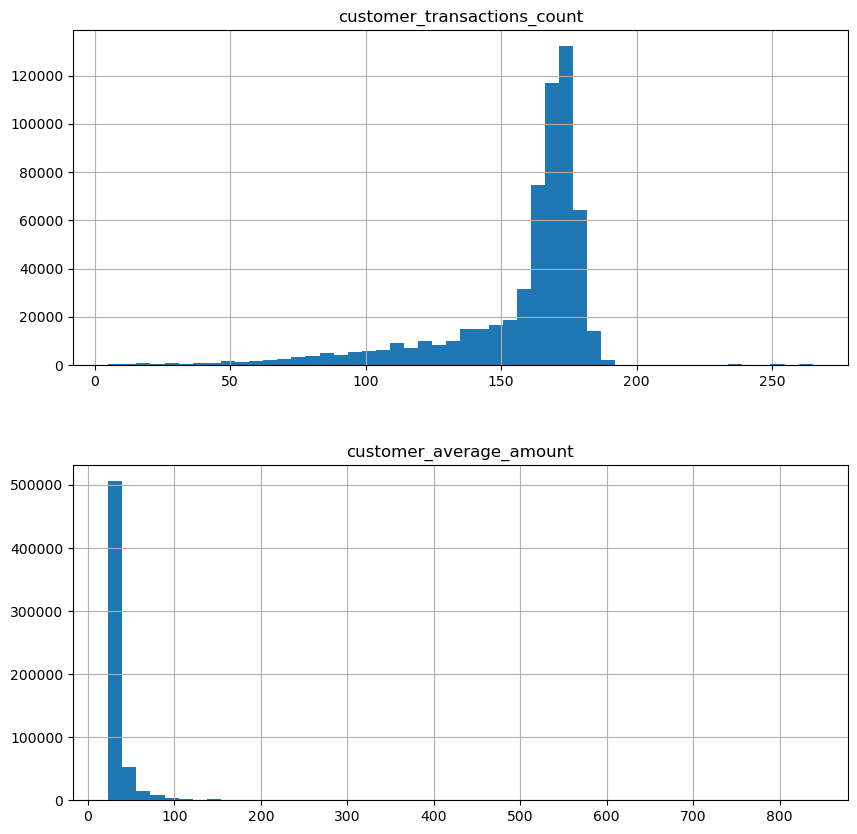

In [32]:
df_model[['customer_transactions_count', 'customer_average_amount']].hist(bins=50, layout=(2,1), figsize=(10,10))
plt.show()

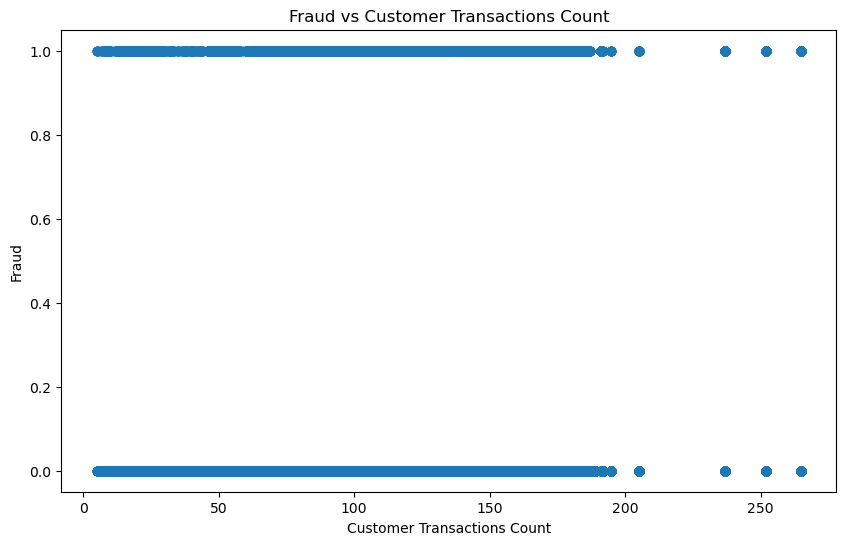

In [33]:
plt.figure(figsize=(10,6))
plt.scatter(df_model['customer_transactions_count'], df_model['fraud'])
plt.title('Fraud vs Customer Transactions Count')
plt.xlabel('Customer Transactions Count')
plt.ylabel('Fraud')

plt.show()

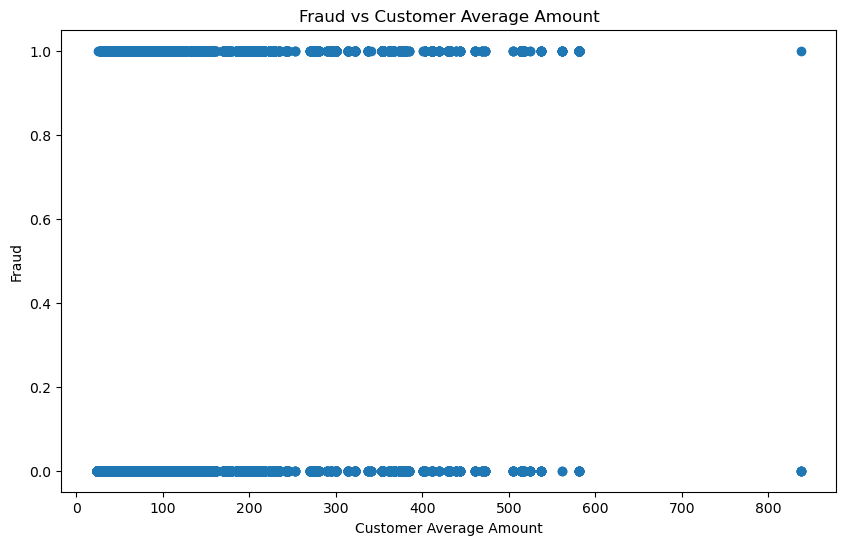

In [34]:
plt.figure(figsize=(10,6))
plt.scatter(df_model['customer_average_amount'], df_model['fraud'])
plt.title('Fraud vs Customer Average Amount')
plt.xlabel('Customer Average Amount')
plt.ylabel('Fraud')

plt.show()

In [35]:
print(df_model[['customer_transactions_count', 'customer_average_amount', 'fraud']].corr()['fraud'])

customer_transactions_count   -0.145561
customer_average_amount        0.469400
fraud                          1.000000
Name: fraud, dtype: float64


## Time
To calculate time since the last transaction, you'll need to sort the data by the transaction time (or step) and customer. This will depend on what data you have. A generic approach could be that you can create a variable that computes the time since the last transaction an account made.


In [36]:
# sort df by some user id and step
df_model.sort_values(['customer', 'step'], ascending=[True,True], inplace=True)
# calculate difference between current and previous step for each user
df_model['time_since_last_transaction']  = df_model.groupby('customer')['step'].diff()

In [37]:
df_model['time_since_last_transaction'].fillna(0, inplace=True)

In [38]:
df_model.head()

,step,customer,age,gender,merchant,amount,fraud,gender_E,gender_F,gender_M,...,category_es_sportsandtoys,category_es_tech,category_es_transportation,category_es_travel,category_es_wellnessandbeauty,merchant_transactions_count,merchant_average_amount,customer_transactions_count,customer_average_amount,time_since_last_transaction
80563,30,C1000148617,5,M,M1888755466,143.87,0,False,False,True,...,False,False,False,False,False,912,135.881524,131,35.091908,0.0
105386,38,C1000148617,5,M,M1741626453,16.69,0,False,False,True,...,True,False,False,False,False,528,173.341742,131,35.091908,8.0
117326,42,C1000148617,5,M,M1888755466,56.18,0,False,False,True,...,False,False,False,False,False,912,135.881524,131,35.091908,4.0
120414,43,C1000148617,5,M,M840466850,14.74,0,False,False,True,...,False,True,False,False,False,1399,137.082273,131,35.091908,1.0
124902,44,C1000148617,5,M,M1823072687,47.42,0,False,False,True,...,False,False,True,False,False,299693,26.953146,131,35.091908,1.0


The histogram can provide insights on the distribution of the `time_since_last_transaction`. The boxplots can provide insights on how the `time_since_last_transaction` distributions differ between fraudulent and non-fraudulent transactions. Finally, the correlation will give a measure of the linear relationship between `time_since_last_transaction` and `isFraud`.

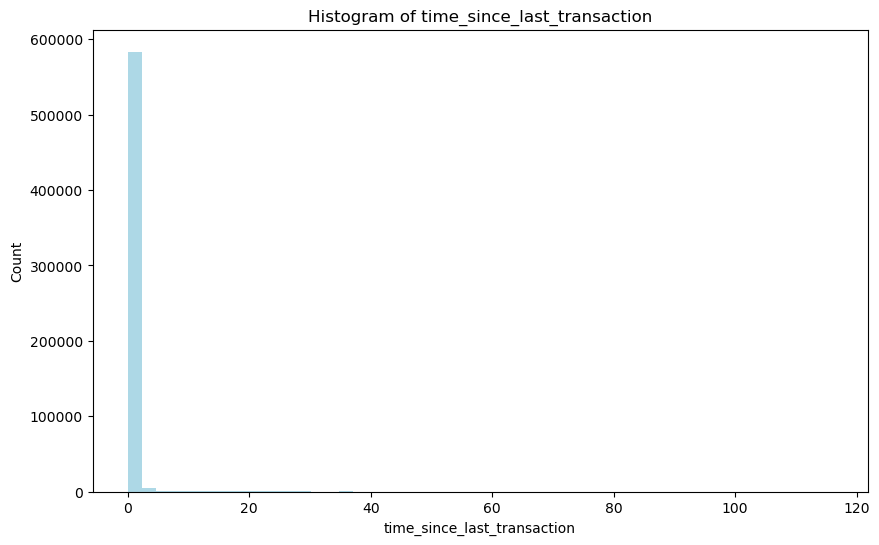

In [39]:
plt.figure(figsize=(10,6))
plt.hist(df_model['time_since_last_transaction'], bins=50, color='lightblue')
plt.title('Histogram of time_since_last_transaction')
plt.xlabel('time_since_last_transaction')
plt.ylabel('Count')
plt.show()

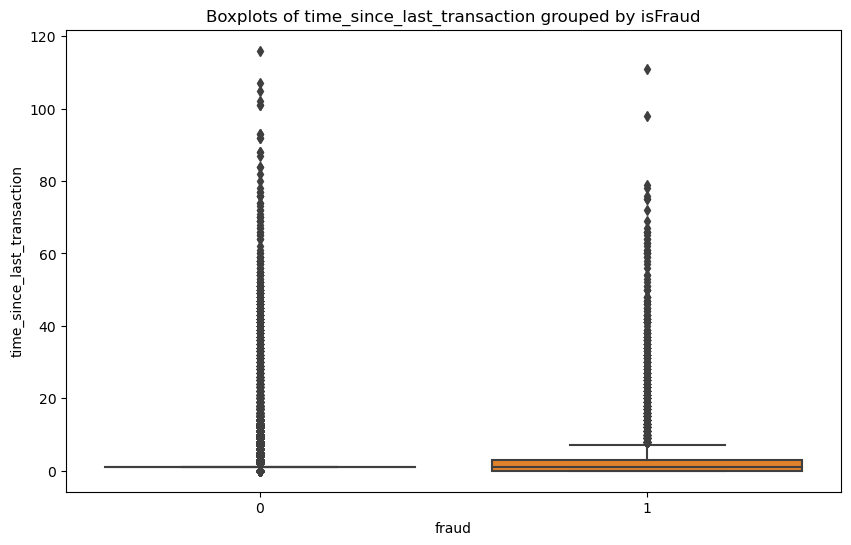

In [40]:
plt.figure(figsize=(10,6))
sns.boxplot(x='fraud', y='time_since_last_transaction', data=df_model)
plt.title('Boxplots of time_since_last_transaction grouped by isFraud')
plt.show()

In [41]:
corr = df_model['fraud'].corr(df_model['time_since_last_transaction'])
print(f"Correlation of isFraud with time_since_last_transaction: {corr}")

Correlation of isFraud with time_since_last_transaction: 0.12788302598236395


In [42]:
df_featured = df_model.drop(columns=['customer', 'merchant'])


**Cumulative Count**: If data is sorted according to time, then we can count cumulative number of transactions up to the current step. This can be of two types:
   - Count till the current time step.
   - Count of fraudulent transactions till the current time step.

#### Additional stuff which I did just to make sense of step


In [43]:
# create 'hour_of_day' feature
df_featured['hour_of_day'] = df_featured['step'] % 24

# Convert 'hour_of_day' to radians
df_featured['hour_sin'] = np.sin(2 * np.pi * df_featured['hour_of_day']/24)
df_featured['hour_cos'] = np.cos(2 * np.pi * df_featured['hour_of_day']/24)

df_featured = df_featured.drop(columns=['hour_of_day'])

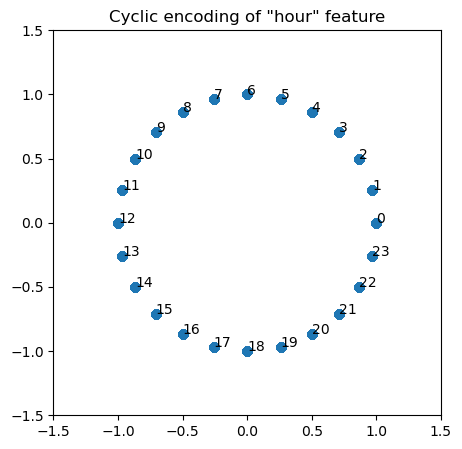

In [44]:
# Circle plot for 24 hours
plt.figure(figsize=(5,5))
plt.scatter(df_featured['hour_cos'], df_featured['hour_sin'])
plt.xlim([-1.5, 1.5])
plt.ylim([-1.5, 1.5])

# Annotate each point with its corresponding hour
for i in range(24):
    hour_sin = np.sin(2 * np.pi * i/24)
    hour_cos = np.cos(2 * np.pi * i/24)
    plt.text(hour_cos, hour_sin, str(i))

plt.title('Cyclic encoding of "hour" feature')
plt.show()

In [45]:
df_featured.head()

,step,age,gender,amount,fraud,gender_E,gender_F,gender_M,gender_U,category_es_barsandrestaurants,...,category_es_transportation,category_es_travel,category_es_wellnessandbeauty,merchant_transactions_count,merchant_average_amount,customer_transactions_count,customer_average_amount,time_since_last_transaction,hour_sin,hour_cos
80563,30,5,M,143.87,0,False,False,True,False,False,...,False,False,False,912,135.881524,131,35.091908,0.0,1.000000,6.123234e-17
105386,38,5,M,16.69,0,False,False,True,False,False,...,False,False,False,528,173.341742,131,35.091908,8.0,-0.500000,-8.660254e-01
117326,42,5,M,56.18,0,False,False,True,False,False,...,False,False,False,912,135.881524,131,35.091908,4.0,-1.000000,-1.836970e-16
120414,43,5,M,14.74,0,False,False,True,False,False,...,False,False,False,1399,137.082273,131,35.091908,1.0,-0.965926,2.588190e-01
124902,44,5,M,47.42,0,False,False,True,False,False,...,True,False,False,299693,26.953146,131,35.091908,1.0,-0.866025,5.000000e-01


In [46]:
print(df_featured[['hour_sin', 'hour_cos', 'fraud']].corr()['fraud'])

hour_sin    0.000347
hour_cos    0.000115
fraud       1.000000
Name: fraud, dtype: float64


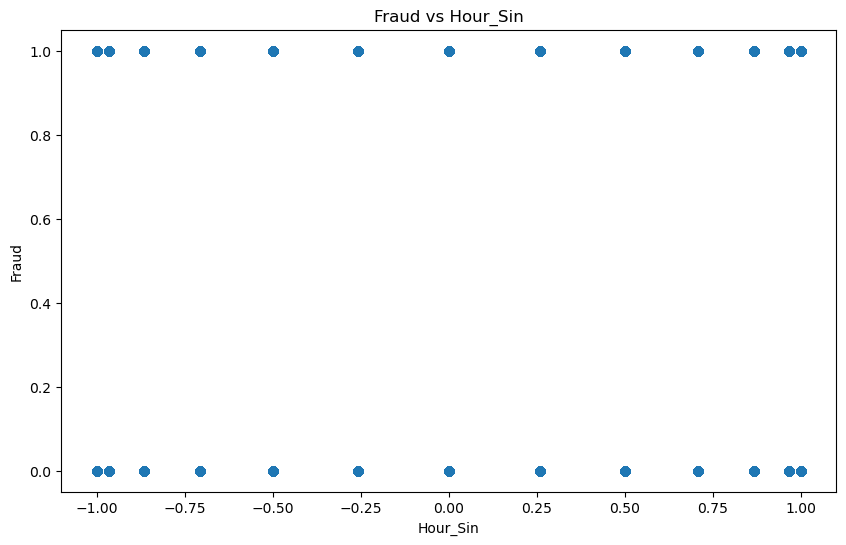

In [47]:
# Scatter plot for 'hour_sin'
plt.figure(figsize=(10,6))
plt.scatter(df_featured['hour_sin'], df_featured['fraud'])
plt.title('Fraud vs Hour_Sin')
plt.xlabel('Hour_Sin')
plt.ylabel('Fraud')
plt.show()


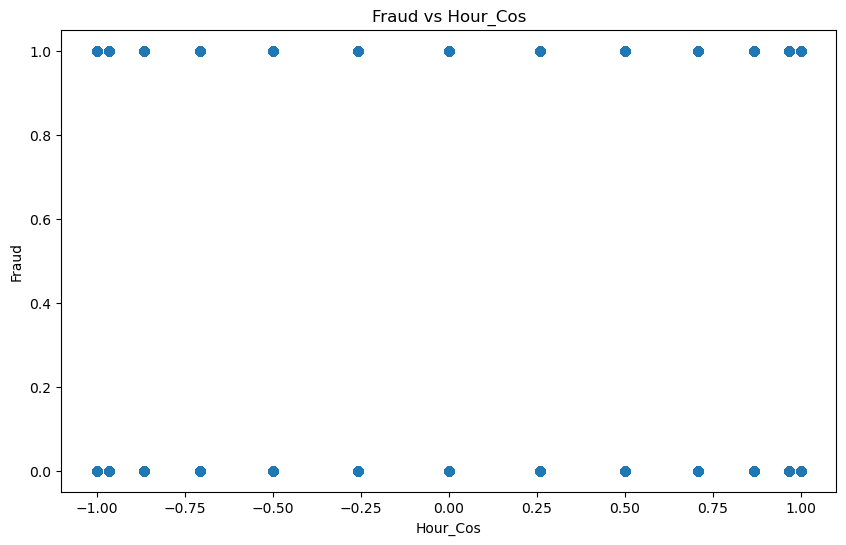

In [48]:
# Scatter plot for 'hour_cos'
plt.figure(figsize=(10,6))
plt.scatter(df_featured['hour_cos'], df_featured['fraud'])
plt.title('Fraud vs Hour_Cos')
plt.xlabel('Hour_Cos')
plt.ylabel('Fraud')
plt.show()

### Time of day

In [49]:
def assign_part_of_day(step):
    hour = step % 24
    if 5 <= hour < 12:
        return 'morning'
    elif 12 <= hour < 17:
        return 'afternoon'
    elif 17 <= hour < 21:
        return 'evening'
    else:
        return 'night'

df_featured['part_of_day'] = df_featured['step'].apply(assign_part_of_day)

In [50]:
# One-hot encode 'part_of_day' feature
df_featured = pd.get_dummies(df_featured, columns=['part_of_day'])

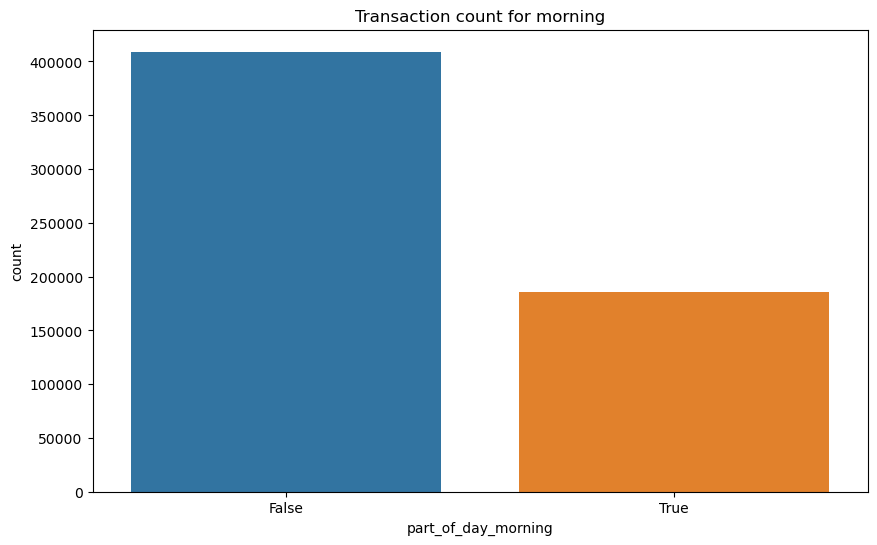

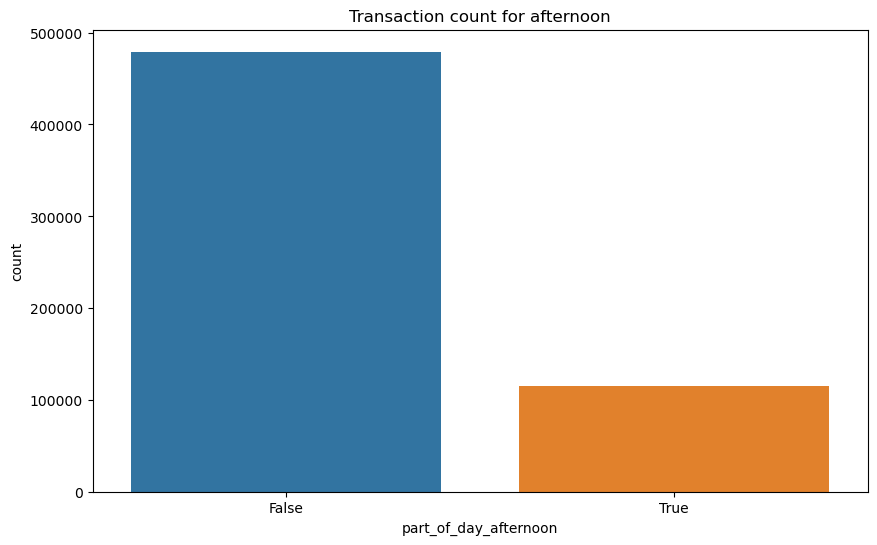

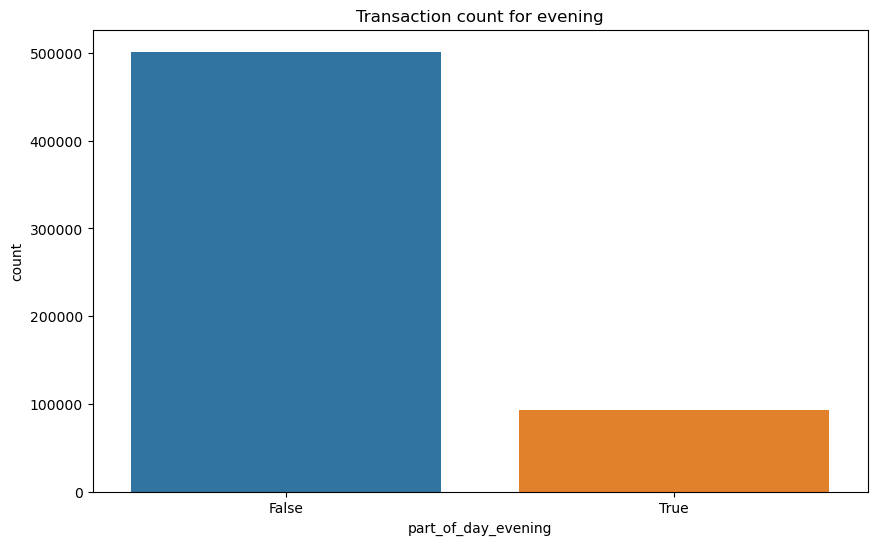

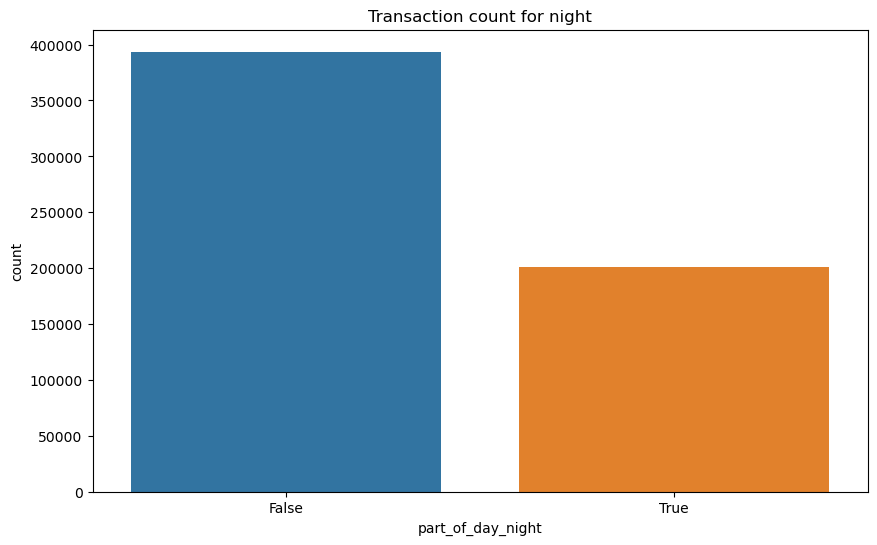

In [51]:
for period in ['morning', 'afternoon', 'evening', 'night']:
    plt.figure(figsize=(10, 6))
    sns.countplot(data=df_featured, x=f'part_of_day_{period}')
    plt.title(f'Transaction count for {period}')
    plt.show()

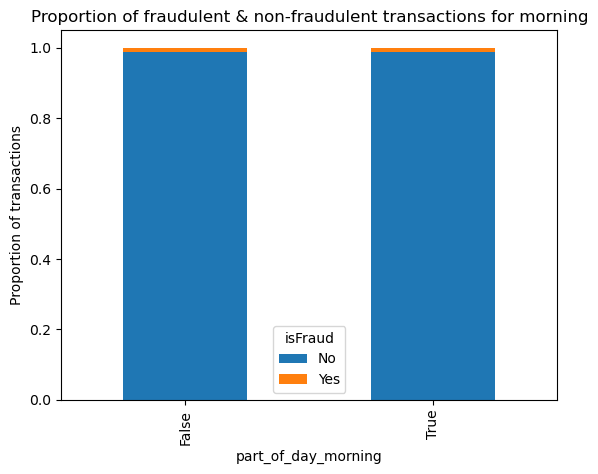

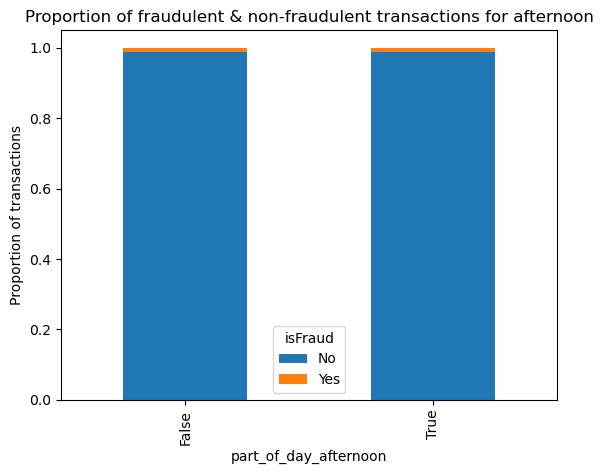

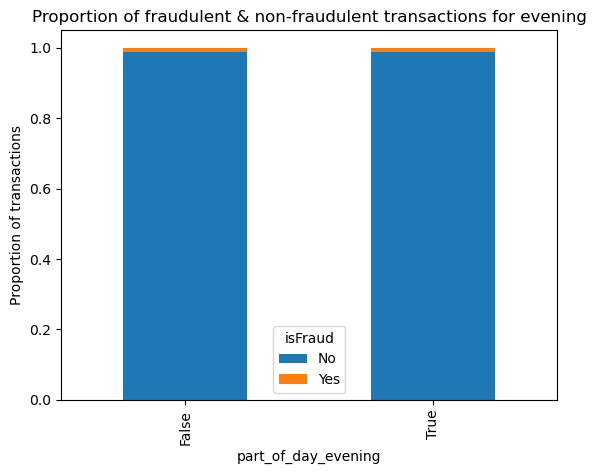

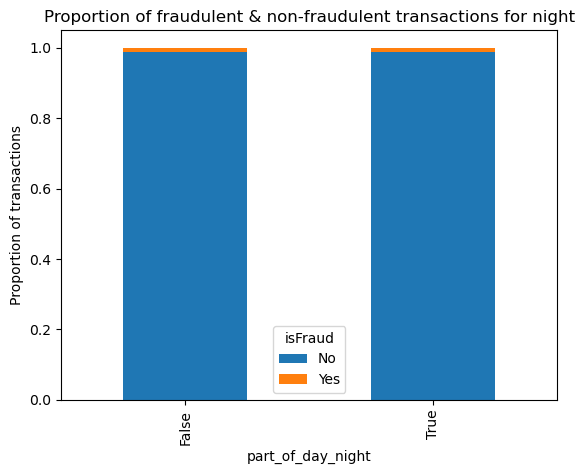

In [52]:
for period in ['morning', 'afternoon', 'evening', 'night']:
    # Calculate counts for each class (fraud / not fraud)
    counts = df_featured.groupby(f'part_of_day_{period}')['fraud'].value_counts().unstack().fillna(0)
    # Normalize counts to represent proportions
    proportions = counts.div(counts.sum(axis = 'columns'), axis = 'index')

    # Create stacked bar chart
    ax = proportions.plot(kind='bar', stacked=True)
    ax.set_title(f'Proportion of fraudulent & non-fraudulent transactions for {period}');
    ax.set_ylabel('Proportion of transactions')
    ax.legend(title='isFraud', labels=['No', 'Yes'])

plt.show()

In [53]:
# Correlation of isFraud with part_of_day
for time_period in ['morning', 'afternoon', 'evening', 'night']:
    col_name = f'part_of_day_{time_period}'
    corr = df_featured['fraud'].corr(df_featured[col_name])
    print(f"Correlation of isFraud with {col_name}: {corr}")

Correlation of isFraud with part_of_day_morning: -0.00016838122707529094
Correlation of isFraud with part_of_day_afternoon: 0.00020352152444156547
Correlation of isFraud with part_of_day_evening: -0.00031811974862397705
Correlation of isFraud with part_of_day_night: 0.00023928628613564639


In [54]:
df_time = df_featured.drop(columns=['step', 'gender'])

# Correlation

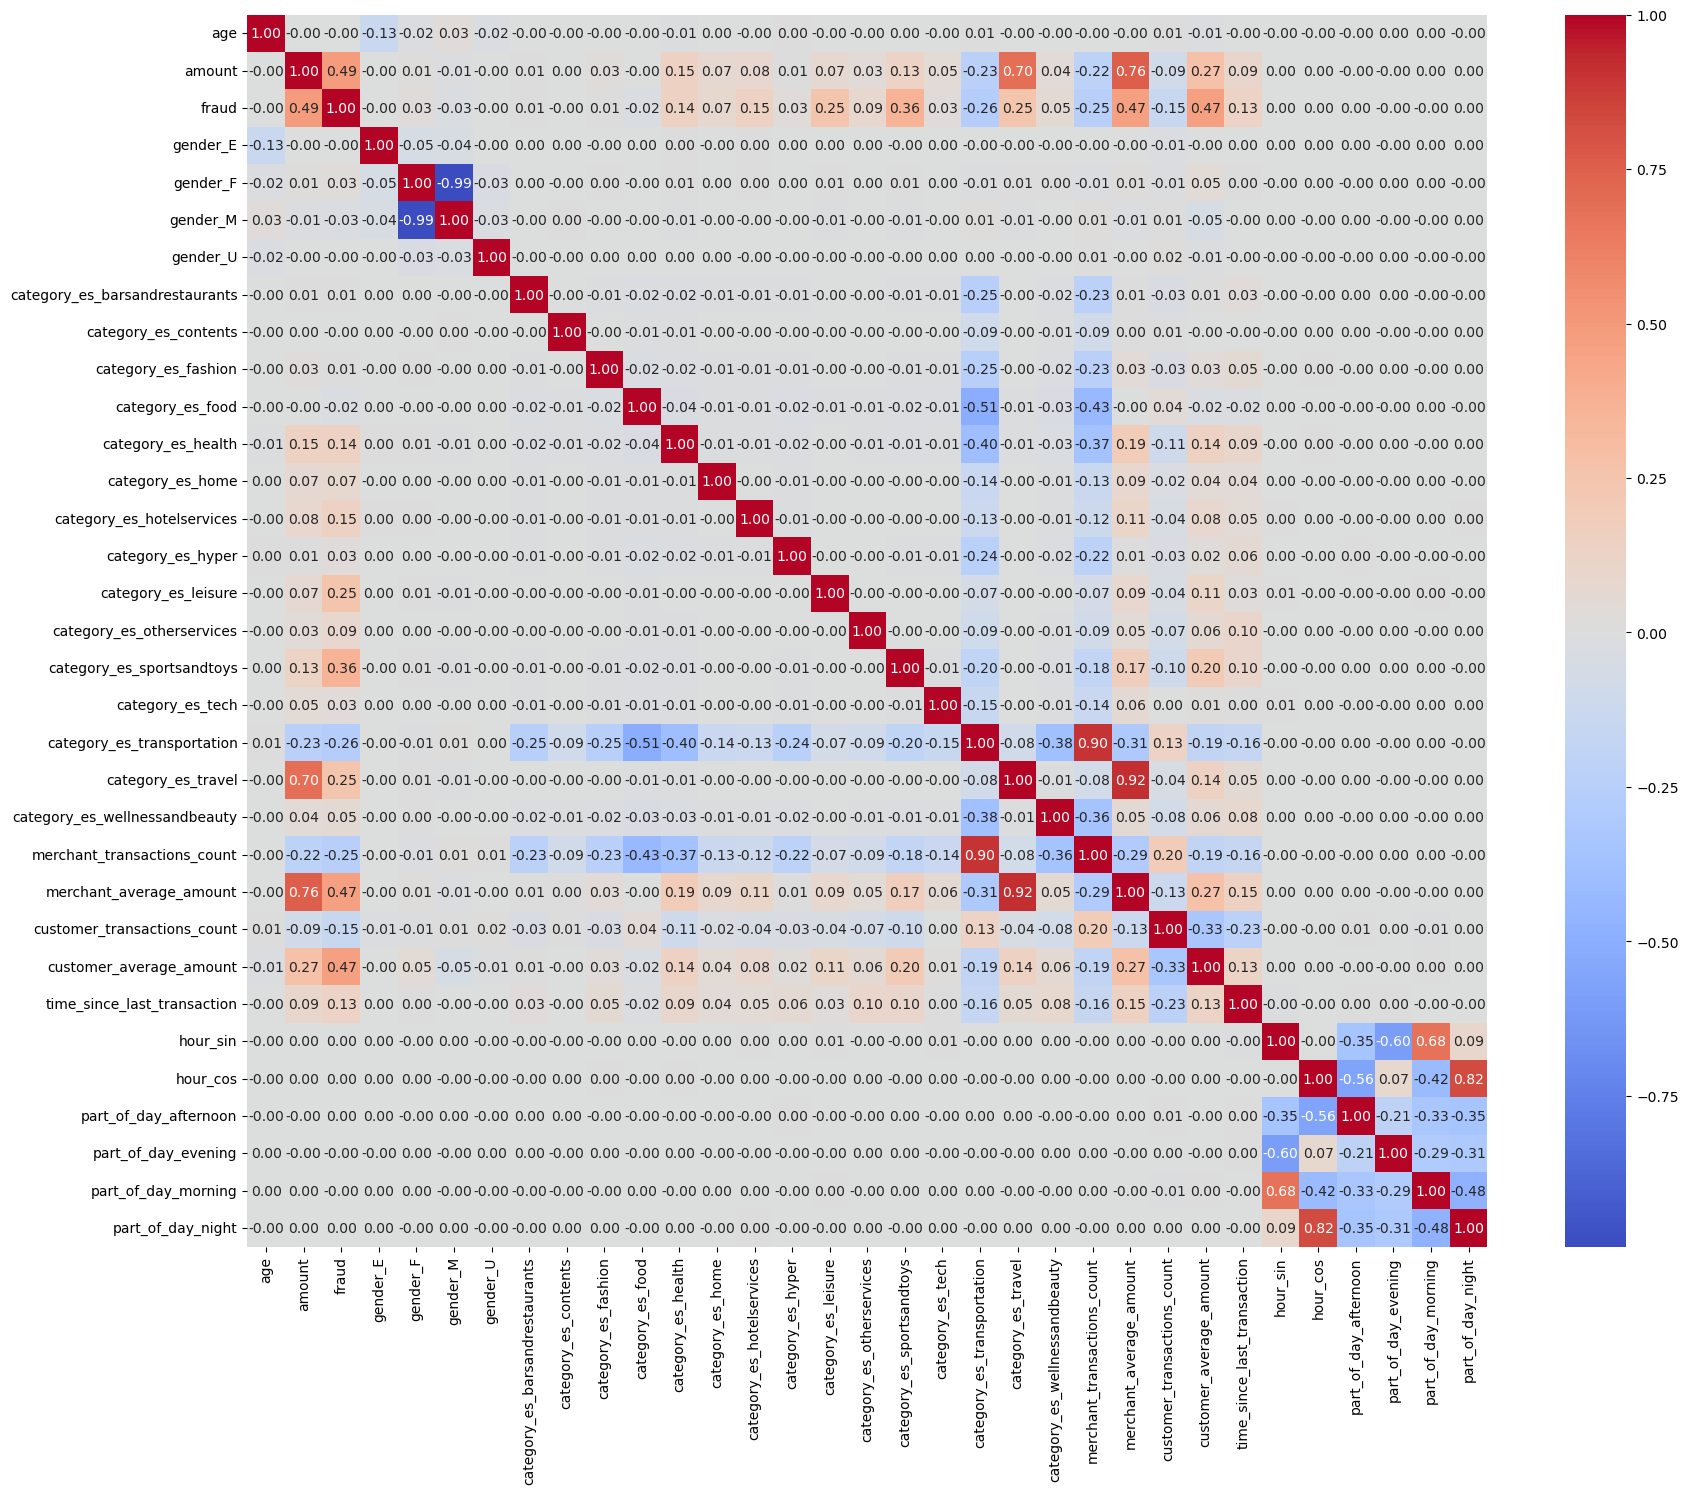

In [56]:
corr = df_time.corr()
plt.figure(figsize=(20,16))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.show()

# Features Spliting, Test-Train split and features Scaling

In [57]:
# Splitting the features and target variable
X = df_time.drop('fraud', axis=1)
y = df_time['fraud']

In [58]:
# Train-Test split
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

In [59]:
# Specify the features to scale
features_to_scale = ['amount', 'merchant_transactions_count', 'merchant_average_amount',
                     'customer_transactions_count', 'customer_average_amount', 'hour_sin', 'hour_cos', 'time_since_last_transaction']

In [60]:
# Initialize the scaler
scaler = MinMaxScaler()


In [61]:
X_train.shape

(475714, 32)

In [62]:
X_test.shape

(118929, 32)

In [63]:
y_train.shape

(475714,)

In [64]:
y_test.shape

(118929,)

In [65]:
# Fit on the training data and transform both training and test data
X_train[features_to_scale] = scaler.fit_transform(X_train[features_to_scale])
X_test[features_to_scale] = scaler.transform(X_test[features_to_scale])

#Model Selection using ROC-AUC score.





In [77]:
# Initialize models
from sklearn.metrics import f1_score, recall_score

models = [
    RandomForestClassifier(random_state=42),
    GradientBoostingClassifier(random_state=42),
    LogisticRegression(max_iter=500, random_state=42),
    MLPClassifier(random_state=42)
]

# Define 5-fold stratified cross-validation
cv = StratifiedKFold(n_splits=5)

# Initialize SMOTE
smote = SMOTE(random_state=42)

# Placeholder for the scores
model_metrics = {}

# Loop over models
for model in models:

    f1_scores = []
    recall_scores = []

    # Perform cross-validation manually
    for train_index, test_index in cv.split(X_train, y_train):
        X_train_fold, X_test_fold = X_train.iloc[train_index], X_train.iloc[test_index]
        y_train_fold, y_test_fold = y_train.iloc[train_index], y_train.iloc[test_index]
        # Apply SMOTE on the training data only
        X_train_smote, y_train_smote = smote.fit_resample(X_train_fold, y_train_fold)

        # Fit and predict
        model.fit(X_train_smote, y_train_smote)
        y_pred = model.predict(X_test_fold)

        # Compute F1-score and Recall, then append to their respective lists
        
        f1_scores.append(f1_score(y_test_fold, y_pred))
        recall_scores.append(recall_score(y_test_fold, y_pred))

    # Store the average scores in the dictionary
    model_name = model.__class__.__name__
    model_metrics[model_name] = {'F1-score': np.mean(f1_scores), 'Recall': np.mean(recall_scores)}
        
# Print out the stored metrics
for model_name, metrics in model_metrics.items():
    print(f'{model_name}:')
    for metric_name, score in metrics.items():
        print(f'    Average {metric_name}: {score}')

RandomForestClassifier:
    Average F1-score: 0.8162269268763908
    Average Recall: 0.9114583333333334
GradientBoostingClassifier:
    Average F1-score: 0.653704519197605
    Average Recall: 0.9677083333333334
LogisticRegression:
    Average F1-score: 0.5442787276273024
    Average Recall: 0.9814236111111111
MLPClassifier:
    Average F1-score: 0.7083938330901073
    Average Recall: 0.9282986111111111


**Based on score, we will go ahead with Logistic Regression.**

RandomForestClassifier: AUC - 0.9966569338370312
GradientBoostingClassifier: AUC - 0.997559357623975
LogisticRegression: AUC - 0.9963793068727324
MLPClassifier: AUC - 0.9970640525523595


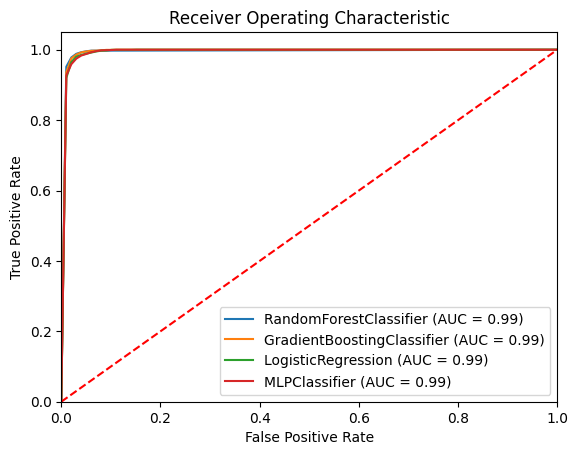

In [ ]:
models = [
    RandomForestClassifier(random_state=42),
    GradientBoostingClassifier(random_state=42),
    LogisticRegression(max_iter=500, random_state=42),
    MLPClassifier(random_state=42)
]

cv = StratifiedKFold(n_splits=5)
smote = SMOTE(random_state=42)

for model in models:

    scores = []
    tpr_list = []
    auc_list = []
    mean_fpr = np.linspace(0, 1, 100)

    for train_index, test_index in cv.split(X_train, y_train):
        X_train_fold, X_test_fold = X_train.iloc[train_index], X_train.iloc[test_index]
        y_train_fold, y_test_fold = y_train.iloc[train_index], y_train.iloc[test_index]

        X_train_smote, y_train_smote = smote.fit_resample(X_train_fold, y_train_fold)

        model_clone = model
        model_clone.fit(X_train_smote, y_train_smote)
        y_proba = model_clone.predict_proba(X_test_fold)[:, 1]
        scores.append(roc_auc_score(y_test_fold, y_proba))

        # Compute ROC curve and area the curve
        fpr, tpr, thresholds = roc_curve(y_test_fold, y_proba)
        tpr_list.append(np.interp(mean_fpr, fpr, tpr))
        tpr_list[-1][0] = 0.0
        roc_auc = auc(fpr, tpr)
        auc_list.append(roc_auc)

    mean_tpr = np.mean(tpr_list, axis=0)
    mean_tpr[-1] = 1.0
    mean_auc = auc(mean_fpr, mean_tpr)
    print(f'{model.__class__.__name__}: AUC - {np.mean(scores)}')

    plt.plot(mean_fpr, mean_tpr, label=f'{model.__class__.__name__} (AUC = {mean_auc:.2f})')

plt.plot([0, 1], [0, 1], linestyle='--', color='r')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

# Logistic Regression training



1.   Training with imbalance data, to set base criteria



              precision    recall  f1-score   support

           0       1.00      1.00      1.00    117489
           1       0.90      0.65      0.75      1440

    accuracy                           0.99    118929
   macro avg       0.95      0.82      0.87    118929
weighted avg       0.99      0.99      0.99    118929



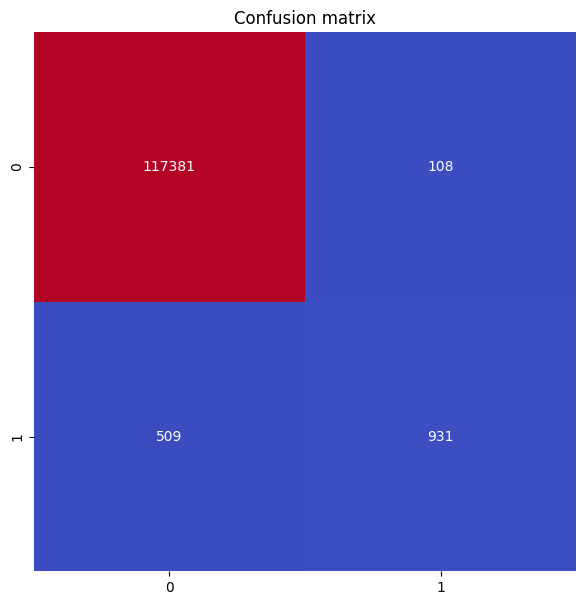

In [90]:
# Initialize the model
model_imb = LogisticRegression(max_iter=700)

# Train the model
model_imb.fit(X_train, y_train)

# Make predictions on the Test data
y_pred = model_imb.predict(X_test)

# Print a classification report to evaluate the results
print(classification_report(y_test, y_pred))

# Print the confusion matrix
conf_mat = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(7,7))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='coolwarm', cbar=False)
plt.title('Confusion matrix')
plt.show()

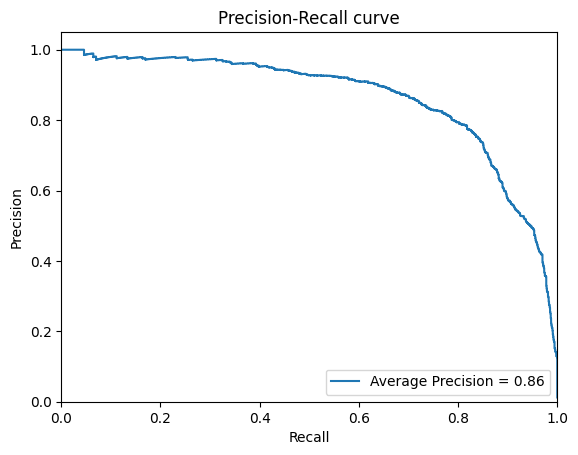

In [94]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score
#import matplotlib.pyplot as plt

# Predict probabilities for the test data
y_pred_proba = model_imb.predict_proba(X_test)[:, 1]

# Compute Precision-Recall and plot curve
precision, recall, _ = precision_recall_curve(y_test, y_pred_proba)
average_precision = average_precision_score(y_test, y_pred_proba)

plt.figure()
plt.step(recall, precision, where='post', label=f'Average Precision = {average_precision:.2f}')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('Precision-Recall curve')
plt.legend(loc="lower right")
plt.show()

2.   Using Smote to balance the dataset.


In [96]:
# Apply SMOTE on the training data
sm = SMOTE(random_state=42)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train)

              precision    recall  f1-score   support

           0       1.00      0.98      0.99    117489
           1       0.39      0.98      0.55      1440

    accuracy                           0.98    118929
   macro avg       0.69      0.98      0.77    118929
weighted avg       0.99      0.98      0.98    118929



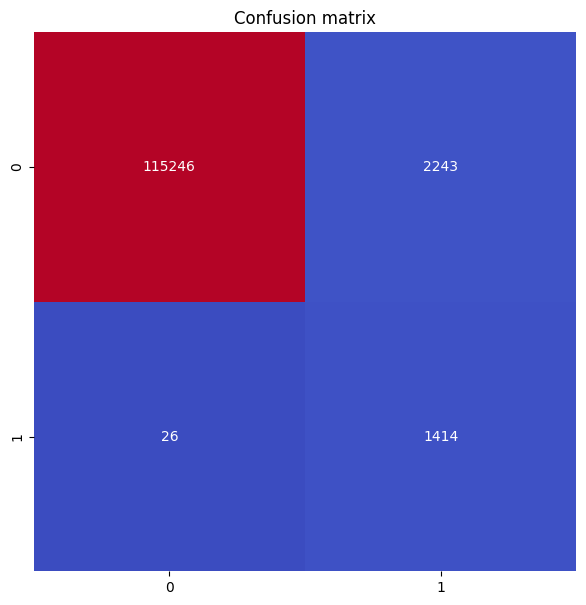

In [97]:
# Initialize the model
model_sm = LogisticRegression(max_iter=700)

# Train the model
model_sm.fit(X_train_res, y_train_res)

# Make predictions on the Test data
y_pred = model_sm.predict(X_test)

# Print a classification report to evaluate the results
print(classification_report(y_test, y_pred))

# Print the confusion matrix
conf_mat = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(7,7))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='coolwarm', cbar=False)
plt.title('Confusion matrix')
plt.show()

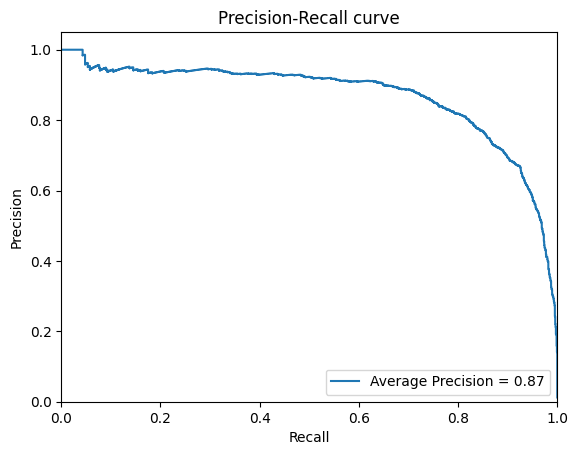

In [98]:
# Predict probabilities for the test data
y_pred_proba = model_sm.predict_proba(X_test)[:, 1]

# Compute Precision-Recall and plot curve
precision, recall, _ = precision_recall_curve(y_test, y_pred_proba)
average_precision = average_precision_score(y_test, y_pred_proba)

plt.figure()
plt.step(recall, precision, where='post', label=f'Average Precision = {average_precision:.2f}')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('Precision-Recall curve')
plt.legend(loc="lower right")
plt.show()

3. Using Undersample to balance the dataset.

In [100]:
rus = RandomUnderSampler(random_state=42)
X_train_res1, y_train_res1 = rus.fit_resample(X_train, y_train)

              precision    recall  f1-score   support

           0       1.00      0.92      0.96    117489
           1       0.14      1.00      0.24      1440

    accuracy                           0.92    118929
   macro avg       0.57      0.96      0.60    118929
weighted avg       0.99      0.92      0.95    118929



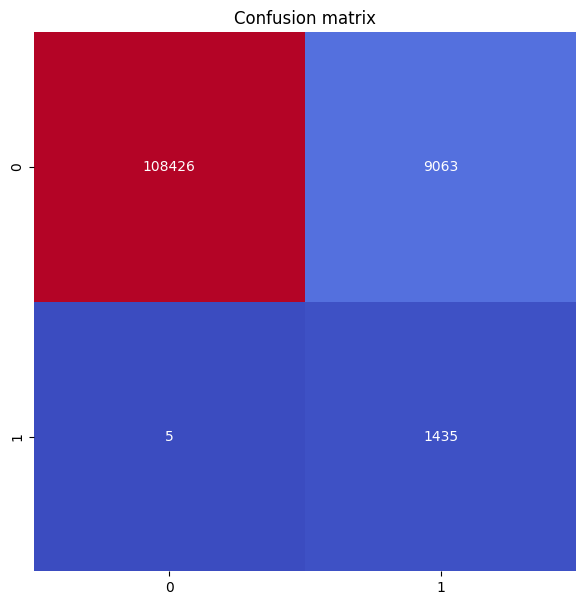

In [101]:

# Initialize the model
model_rus = LogisticRegression(max_iter=700)

# Train the model
model_rus.fit(X_train_res1, y_train_res1)

# Make predictions on the Test data
y_pred = model_rus.predict(X_test)

# Print a classification report to evaluate the results
print(classification_report(y_test, y_pred))

# Print the confusion matrix
conf_mat = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(7,7))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='coolwarm', cbar=False)
plt.title('Confusion matrix')
plt.show()

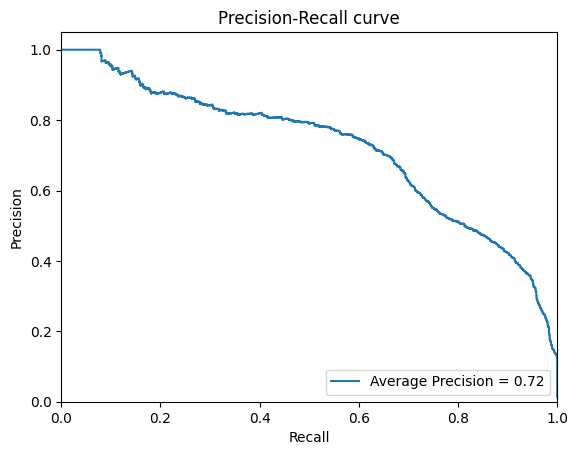

In [102]:
# Predict probabilities for the test data
y_pred_proba = model_rus.predict_proba(X_test)[:, 1]

# Compute Precision-Recall and plot curve
precision, recall, _ = precision_recall_curve(y_test, y_pred_proba)
average_precision = average_precision_score(y_test, y_pred_proba)

plt.figure()
plt.step(recall, precision, where='post', label=f'Average Precision = {average_precision:.2f}')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('Precision-Recall curve')
plt.legend(loc="lower right")
plt.show()

4. Using Oversample to balance the dataset

In [103]:
ros = RandomOverSampler(random_state=42)
X_train_res2, y_train_res2 = ros.fit_resample(X_train, y_train)


              precision    recall  f1-score   support

           0       1.00      0.97      0.99    117489
           1       0.32      0.99      0.49      1440

    accuracy                           0.97    118929
   macro avg       0.66      0.98      0.74    118929
weighted avg       0.99      0.97      0.98    118929



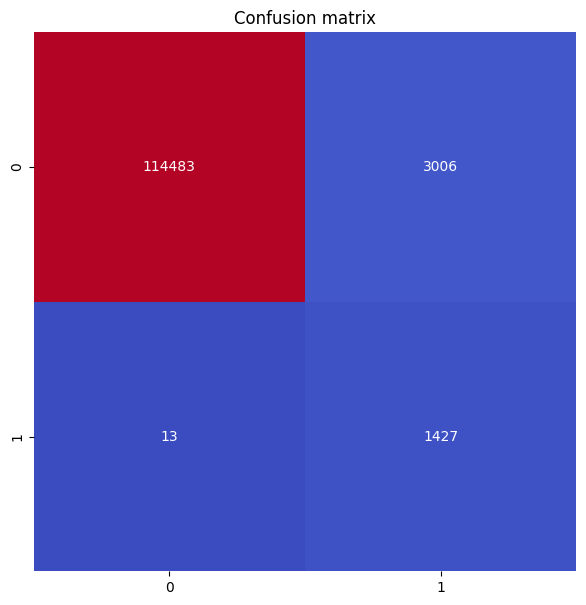

In [104]:
# Initialize the model
model_ros = LogisticRegression(max_iter=900)

# Train the model
model_ros.fit(X_train_res2, y_train_res2)

# Make predictions on the Test data
y_pred = model_ros.predict(X_test)

# Print a classification report to evaluate the results
print(classification_report(y_test, y_pred))

# Print the confusion matrix
conf_mat = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(7,7))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='coolwarm', cbar=False)
plt.title('Confusion matrix')
plt.show()

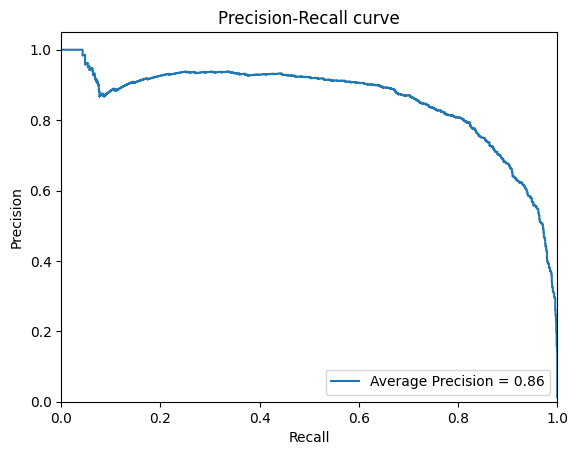

In [105]:
# Predict probabilities for the test data
y_pred_proba = model_ros.predict_proba(X_test)[:, 1]

# Compute Precision-Recall and plot curve
precision, recall, _ = precision_recall_curve(y_test, y_pred_proba)
average_precision = average_precision_score(y_test, y_pred_proba)

plt.figure()
plt.step(recall, precision, where='post', label=f'Average Precision = {average_precision:.2f}')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('Precision-Recall curve')
plt.legend(loc="lower right")
plt.show()

# Hyperparameter Tunning

**Selecting 3rd model which is Undersampled data for fine tunning**




In [75]:

from imblearn.pipeline import Pipeline
from imblearn.under_sampling import RandomUnderSampler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, f1_score, recall_score


# Create a dictionary of the metrics we want to calculate
scoring = {
    'f1': make_scorer(f1_score),
    'recall': make_scorer(recall_score)
}

# Create a pipeline that first applies Random Under Sampling and then trains a logistic regression model
pipeline = Pipeline([
    ("rus", RandomUnderSampler(random_state=42)),
    ("lr", LogisticRegression(max_iter=9000, random_state=42))
])


# Define range of parameters for the grid search
param_grid = {
    "lr__penalty": ["l1", "l2", "elasticnet", "None"],
    "lr__C": np.logspace(-4, 4, 20),
    "lr__solver": ["newton-cg", "lbfgs", "liblinear", "sag", "saga"],
}


# Create the grid search object
grid_search = GridSearchCV(estimator=pipeline, param_grid=param_grid, scoring=scoring, refit='f1', cv=5, n_jobs=-1)

# Conduct the grid search using the training data
grid_search.fit(X_train, y_train)

# Print out the best parameters and the corresponding score
print(f"Best parameters found: {grid_search.best_params_}")
print(f"Best f1 found: {grid_search.best_score_}")

# Get the best model
best_model = grid_search.best_estimator_

Best parameters found: {'lr__C': 1438.44988828766, 'lr__penalty': 'l1', 'lr__solver': 'saga'}
Best f1 found: 0.5031666785204063


# Dimensionality Reduction

Feature: 0, Score: 0.00844
Feature: 1, Score: 35.03113
Feature: 2, Score: -0.22170
Feature: 3, Score: 0.39782
Feature: 4, Score: 0.23640
Feature: 5, Score: -0.47018
Feature: 6, Score: 1.76462
Feature: 7, Score: -0.92023
Feature: 8, Score: 0.99983
Feature: 9, Score: -2.73754
Feature: 10, Score: 1.47656
Feature: 11, Score: 1.37483
Feature: 12, Score: 1.94429
Feature: 13, Score: 2.48804
Feature: 14, Score: 4.62915
Feature: 15, Score: 2.90111
Feature: 16, Score: 2.91236
Feature: 17, Score: 1.58196
Feature: 18, Score: -2.20822
Feature: 19, Score: -18.31621
Feature: 20, Score: 2.05179
Feature: 21, Score: -4.89476
Feature: 22, Score: 22.48366
Feature: 23, Score: 0.47684
Feature: 24, Score: 7.64845
Feature: 25, Score: -0.46917
Feature: 26, Score: -0.11612
Feature: 27, Score: 0.20813
Feature: 28, Score: 0.08733
Feature: 29, Score: -0.08690
Feature: 30, Score: 0.03567
Feature: 31, Score: -0.09377


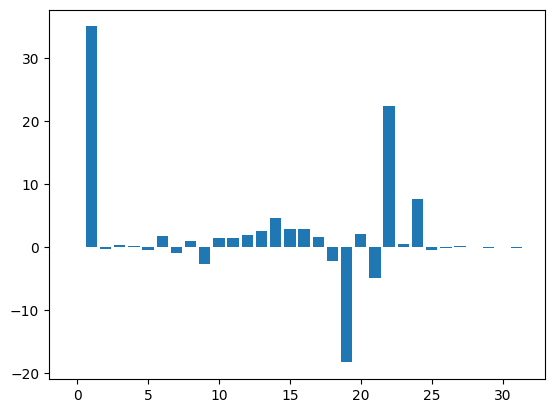

In [106]:
# Get the coefficients (feature importance) from the logistic regression model
importance = model.coef_[0]

# Summarize feature importance
for i,j in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,j))

# Plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

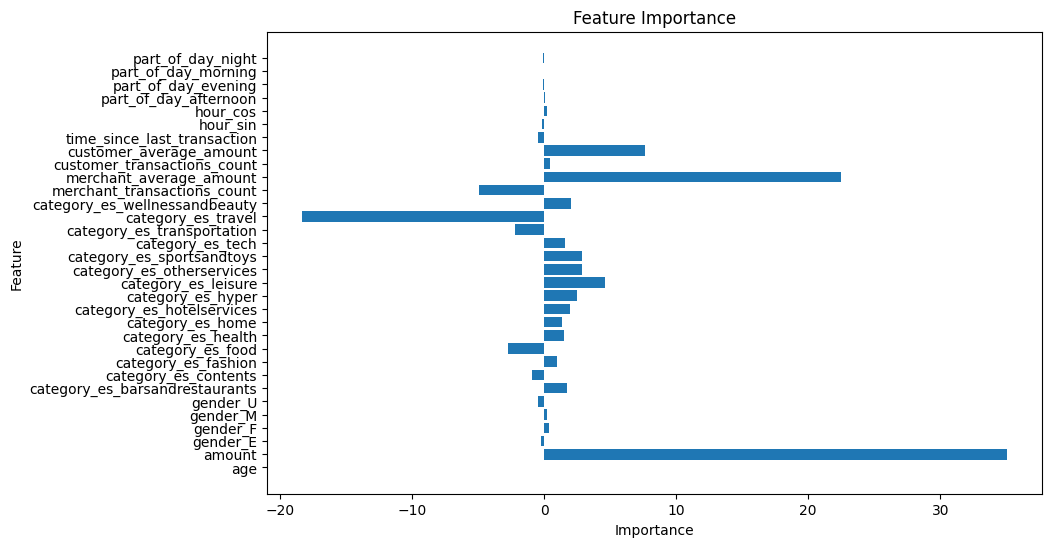

In [108]:
# Assuming `features` is a list of your feature names
features = X_train.columns.tolist()

# Obtain the coefficients from the logistic regression model
importance = model.coef_[0]

# Plot feature importance
plt.figure(figsize=(10, 6))
plt.barh(features, importance)
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance')
plt.show()

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  32 out of  32 | elapsed:    1.3s finished

[2023-11-29 14:29:10] Features: 1/8 -- score: 0.9322681343420575[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  31 out of  31 | elapsed:    1.8s finished

[2023-11-29 14:29:12] Features: 2/8 -- score: 0.9526287113448555[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:    1.1s finished

[2023-11-29 14:29:13] Features: 3/8 -- score: 0.9529436508557033[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 out of  29 | elapsed:    1.2s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  29 out of  29 | elapsed:    1.3s finished

[2023-11-29 14:29:14] Features: 4/8 -- score: 0.9531805807217892[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent work

Selected features: ('age', 'amount', 'gender_E', 'gender_U', 'category_es_contents', 'category_es_fashion', 'category_es_food', 'category_es_transportation')
ROC_AUC score with selected features: 0.9531805807217892



[2023-11-29 14:29:23] Features: 8/8 -- score: 0.9531805807217892

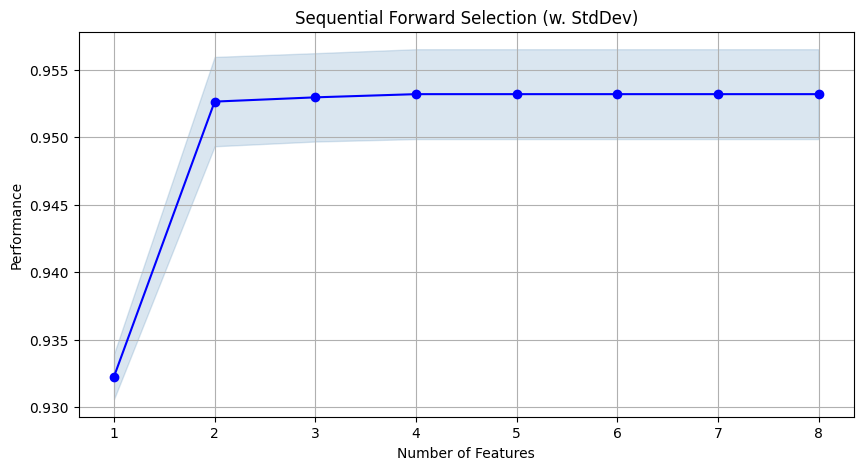

In [115]:
from mlxtend.feature_selection import SequentialFeatureSelector as SFS

# Define the logistic regression model
model = LogisticRegression(max_iter=700, random_state=42)

# Define the forward selection object
sfs = SFS(model,
           k_features=8,
           forward=True,
           floating=False,
           scoring="f1",
           cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=0),
           verbose=2,
           n_jobs=-1)

# Perform forward selection on the training set
sfs.fit(X_train_res1, y_train_res1)

# Selected features
print(f"Selected features: {sfs.k_feature_names_}")

# ROC_AUC score of the best subset of features (in k_feature_names_) with cross validation
print(f"ROC_AUC score with selected features: {sfs.k_score_}")

# Plot the performance of the model with selected features
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs

fig1 = plot_sfs(sfs.get_metric_dict(), kind='std_dev', figsize=(10, 5))
plt.title('Sequential Forward Selection (w. StdDev)')
plt.grid()
plt.show()

In [116]:
feature_names = [X_train_res.columns[i] for i in sfs.k_feature_idx_]
print(f'Selected features: {feature_names}')

Selected features: ['age', 'amount', 'gender_E', 'gender_U', 'category_es_contents', 'category_es_fashion', 'category_es_food', 'category_es_transportation']


In [117]:
print(f"f1 score with selected features: {sfs.k_score_}")


f1 score with selected features: 0.9531805807217892
